In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory data analysis

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors = 'coerce')

In [8]:
data.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [9]:
data.drop('customerID', axis=1, inplace=True)

In [10]:
data.replace('NaN', '', inplace=True)

In [11]:
data['tenure'].replace({0 : np.nan}, inplace = True)

In [12]:
data['SeniorCitizen'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)

In [13]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Only 11 missing values out of ~7000, so these rows can be dropped.

In [14]:
data.dropna(inplace = True)

In [15]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

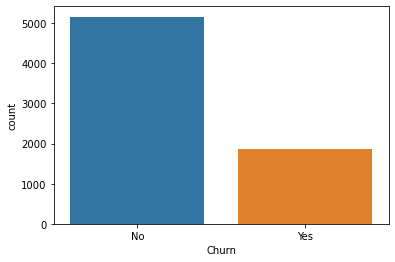

In [16]:
print(data['Churn'].value_counts())
sns.countplot(x='Churn',data=data)

# Inference
Label column is not balanced

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

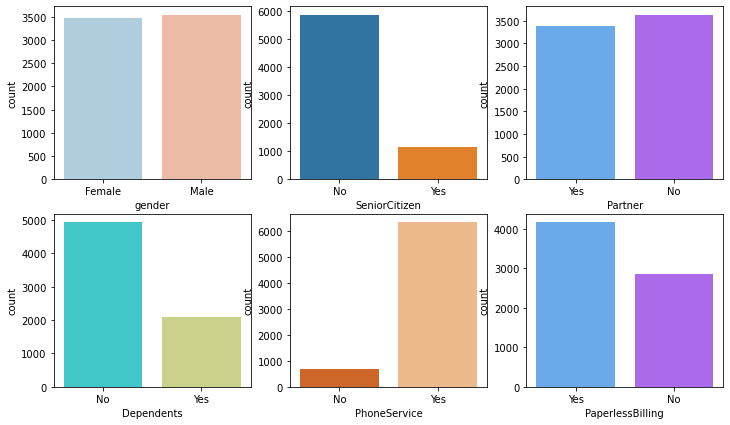

In [17]:
fig,axes=plt.subplots(2,3,figsize=(12,7))

sns.countplot(data=data,x=data['gender'],palette='RdBu_r',ax=axes[0,0])
sns.countplot(data=data,x=data['SeniorCitizen'],ax=axes[0,1])
sns.countplot(data=data,x=data['Partner'],palette='cool',ax=axes[0,2])
sns.countplot(data=data,x=data['Dependents'],palette='rainbow',ax=axes[1,0])
sns.countplot(data=data,x=data['PhoneService'],palette='Oranges_r',ax=axes[1,1])
sns.countplot(data=data,x=data['PaperlessBilling'],palette='cool',ax=axes[1,2])

# Inferences
1. Number of males and females is approx. equal.
2. Most of the customers are not senior citizens.
3. Number of customers with and without a partner is approx. equal.
4. Most of the people are not dependents.
5. A vast majority have phone service.

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

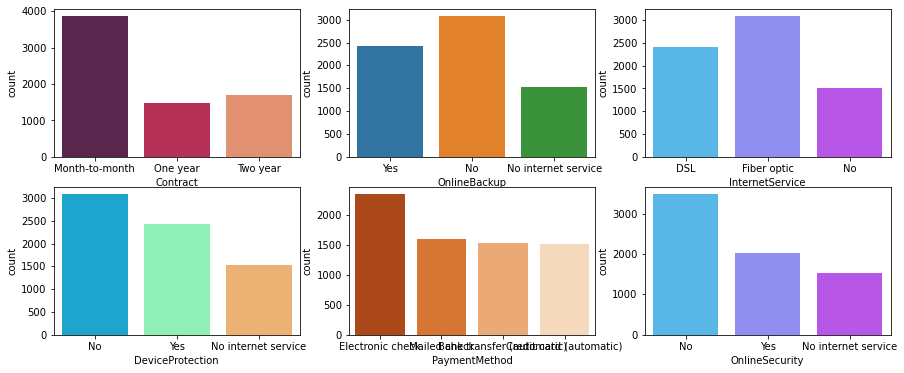

In [18]:
fig,axes=plt.subplots(2,3,figsize=(15,6))

sns.countplot(data=data,x=data['Contract'],palette='rocket',ax=axes[0,0])
sns.countplot(data=data,x=data['OnlineBackup'],ax=axes[0,1])
sns.countplot(data=data,x=data['InternetService'],palette='cool',ax=axes[0,2])
sns.countplot(data=data,x=data['DeviceProtection'],palette='rainbow',ax=axes[1,0])
sns.countplot(data=data,x=data['PaymentMethod'],palette='Oranges_r',ax=axes[1,1])
sns.countplot(data=data,x=data['OnlineSecurity'],palette='cool',ax=axes[1,2])

# Inferences
* Most of the customers uses Electronic type payment method.
* Most of the customers have Fiber optic type of Internet Service.
* Most of customer uses Month-to-Month type contract

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

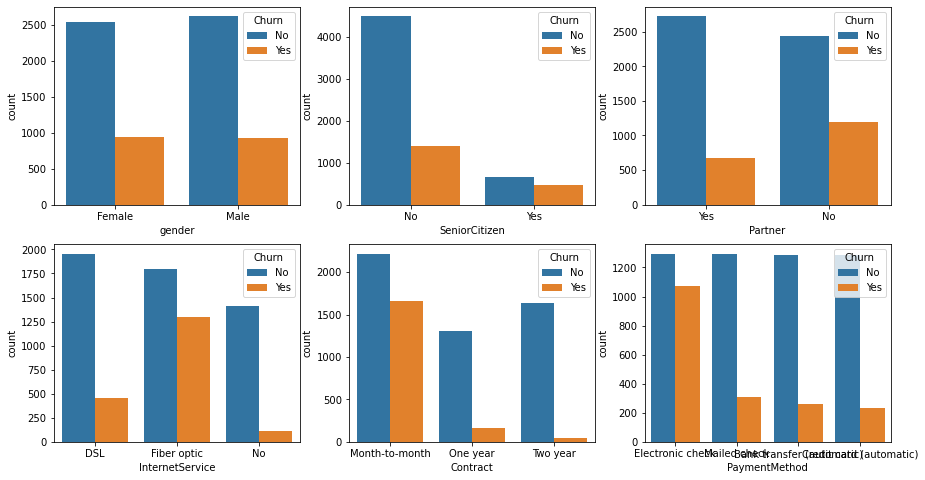

In [19]:
fig,axes=plt.subplots(2,3,figsize=(15,8))

sns.countplot(data=data, x ='gender', hue ='Churn', ax=axes[0,0])
sns.countplot(data=data, x ='SeniorCitizen', hue ='Churn', ax=axes[0,1])
sns.countplot(data=data, x ='Partner', hue ='Churn', ax=axes[0,2])
sns.countplot(data=data, x ='InternetService', hue = 'Churn',ax=axes[1,0])
sns.countplot(data=data, x ='Contract', hue = 'Churn',ax=axes[1,1])
sns.countplot(data=data, x ='PaymentMethod', hue = 'Churn',ax=axes[1,2])

# Inferences
* People who are not senior citizens are less likely to churn than those who are.
* People without a partner are comparatively more likely to churn than those with one.
* Customers with fibre optic have a high churn rate.
* Customers without internet have a very low churn rate.
* Customers who have a one or two year contract have a very low churn rate.
* Majority of the churners have a month-to-month contract.
* Customers who pay via electronic cheque have a high churn rate.


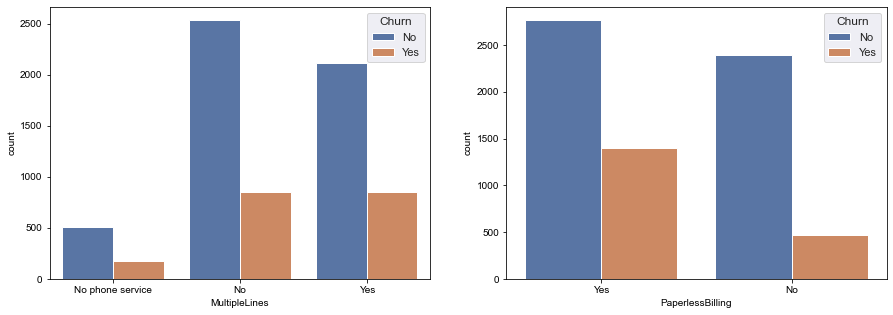

In [20]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = data, x = 'MultipleLines', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = data, hue = 'Churn', x = 'PaperlessBilling')
plt.show()

# Inference
* Customers with multiple lines have a slightly higher churn rate.
* Most customers pay via paper-less billing.These customers however have a high churn rate.

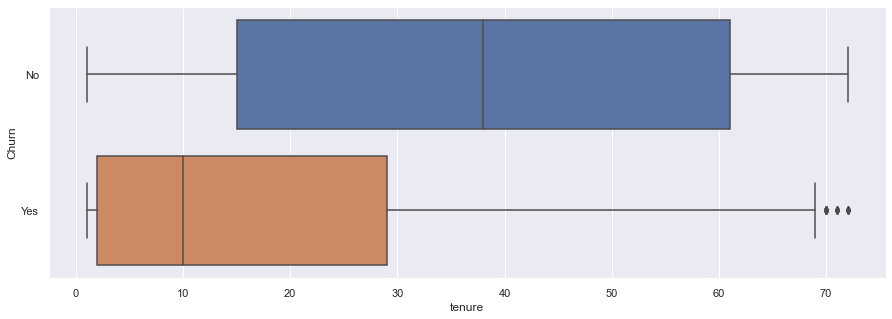

In [21]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = data, y = 'Churn', x = 'tenure', orient = 'h')
plt.show()

# Inference:
It can be observed that people who churn usually have a low value of tenure.

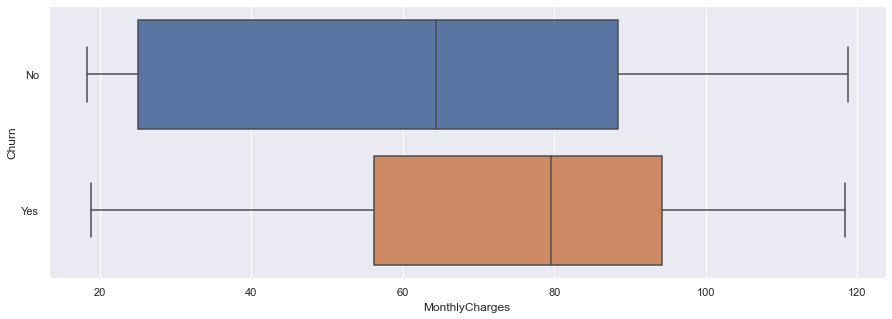

In [22]:
plt.figure(figsize = (15, 5))
sns.boxplot(data = data, y = 'Churn', x = 'MonthlyCharges', orient = "h")
plt.show()

# Inference
Most of the people who churned had higher Monthly Charges

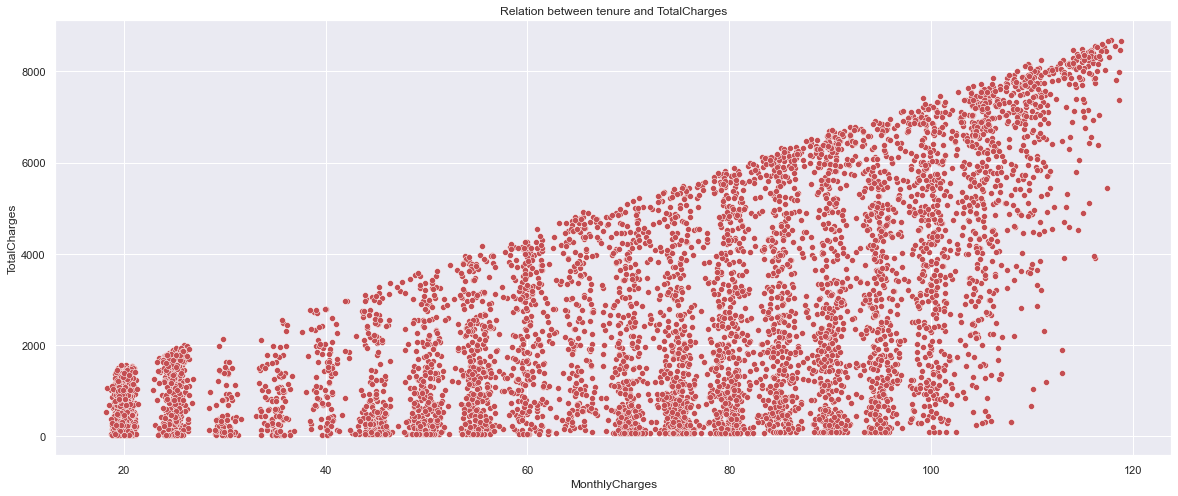

In [23]:
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', data=data, color='r')
plt.title('Relation between tenure and TotalCharges')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


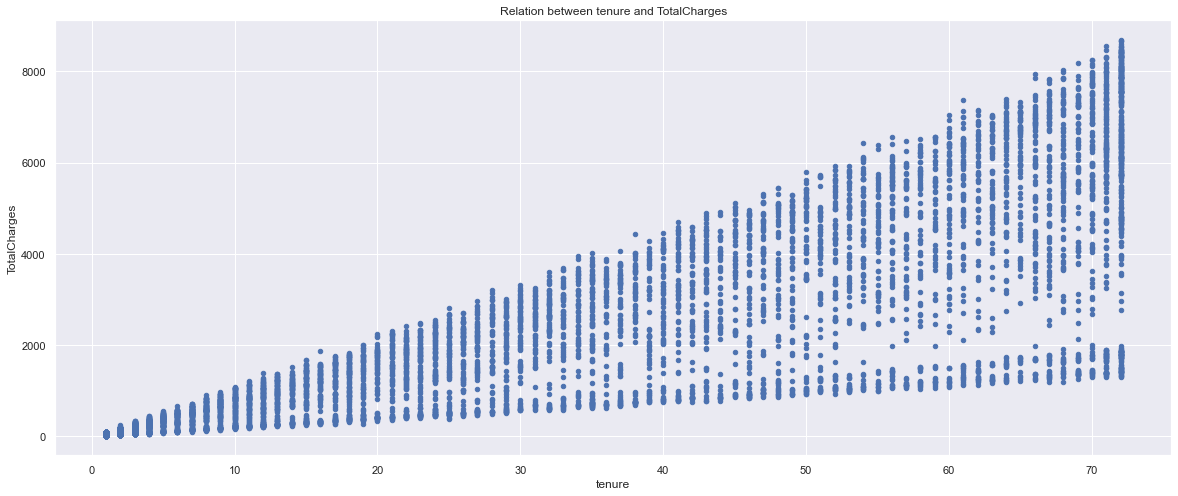

In [24]:
data[['tenure', 'TotalCharges']].plot.scatter(
    figsize = (20, 8), x = 'tenure', y = 'TotalCharges'
)
plt.title('Relation between tenure and TotalCharges')
plt.show()

# Inference
Since monthly charges and total charges are collinear, the latter can be dropped.

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
# function that computes the mutual infomation score between a categorical data and the column Churn
def compute_mutual_information(categorical_series):
    return mutual_info_score(categorical_series, data.Churn)

# select categorial variables excluding the response variable 
categorical_data= data.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_data.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
SeniorCitizen       0.010533
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, 
meaning those variables do not have a strong relationship with the target.
we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

Unique values in gender = ['Female' 'Male']
Unique values in SeniorCitizen = ['No' 'Yes']
Unique values in Partner = ['Yes' 'No']
Unique values in Dependents = ['No' 'Yes']
Unique values in PhoneService = ['No' 'Yes']
Unique values in MultipleLines = ['No phone service' 'No' 'Yes']
Unique values in InternetService = ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity = ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup = ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection = ['No' 'Yes' 'No internet service']
Unique values in TechSupport = ['No' 'Yes' 'No internet service']
Unique values in StreamingTV = ['No' 'Yes' 'No internet service']
Unique values in StreamingMovies = ['No' 'Yes' 'No internet service']
Unique values in Contract = ['Month-to-month' 'One year' 'Two year']
Unique values in PaperlessBilling = ['Yes' 'No']
Unique values in PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Uniq

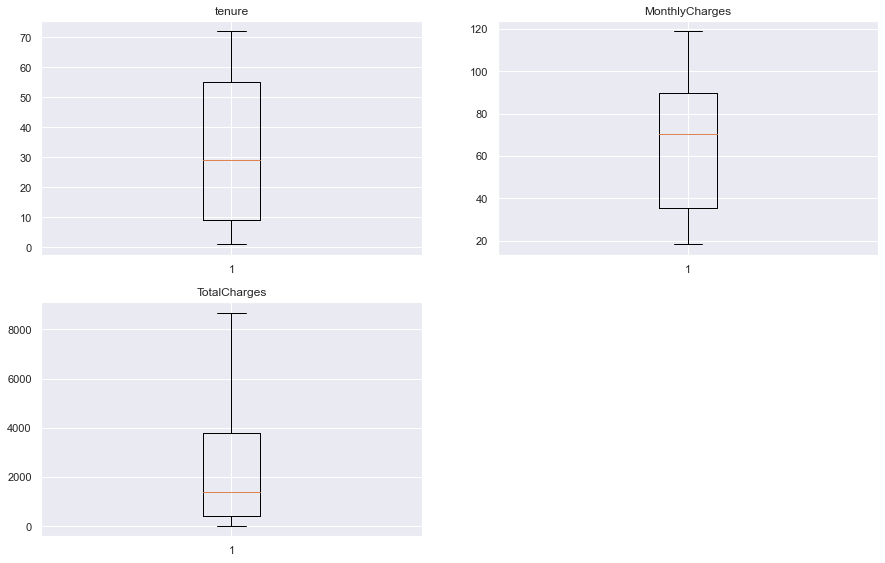

In [27]:
# checking for outliers
plt.figure(figsize = (15,25))
count = 1
for col in data:
    if(data[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,data[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(data[col])
        plt.title(col)
        count +=1
        
plt.show()

In [28]:
data.drop(['gender','PhoneService','MultipleLines','TotalCharges'], axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
enc = LabelEncoder()

In [31]:
Partner=enc.fit_transform(data['Partner'])
Dependents=enc.fit_transform(data['Dependents'])
PaperlessBilling=enc.fit_transform(data['PaperlessBilling'])
Churn=enc.fit_transform(data['Churn'])

In [32]:
data['Partner']=Partner
data['Dependents']=Dependents
data['PaperlessBilling']=PaperlessBilling
data['Churn']=Churn

In [33]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [34]:
X =pd.get_dummies(X)

In [35]:
X.head()

,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,SeniorCitizen_No,SeniorCitizen_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1.0,1,29.85,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,34.0,0,56.95,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,2.0,1,53.85,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,45.0,0,42.30,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,2.0,1,70.70,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


# Balancing Label column using SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
sm = SMOTE(random_state=2)

X_smote,y_smote=sm.fit_resample(X,y)

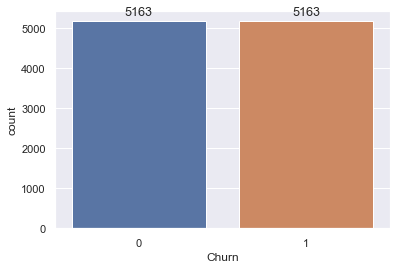

In [39]:
a = sns.countplot(y_smote)
for p in a.patches:
    a.annotate(format(p.get_height()),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',
               va='center',xytext=(0,9),textcoords='offset points',fontsize=12.6)

# Splitting the data for train and test

In [41]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.2,random_state = 0)

# Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [45]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# lets save the scaler object

In [47]:
import pickle
import os

In [48]:
scaler_path=os.path.join(r'G:\churn.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [51]:
lr.fit(X_train_std,y_train)

LogisticRegression()

In [52]:
y_pred_lr=lr.predict(X_test_std)
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
#importing classification metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [54]:
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_lr

0.861568247821878

In [55]:
cf = confusion_matrix(y_test,y_pred_lr)
cf

array([[882, 124],
       [162, 898]], dtype=int64)

<AxesSubplot:>

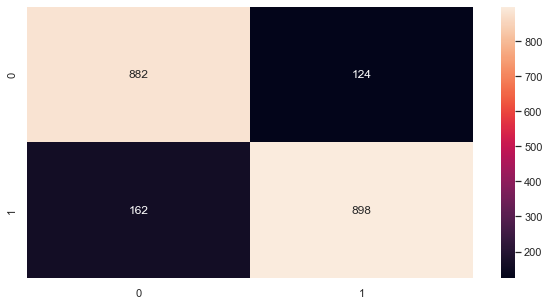

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [60]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [61]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.856727976766699

In [62]:
cf = confusion_matrix(y_test, rf_clf.predict(X_test))
cf

array([[871, 135],
       [161, 899]], dtype=int64)

<AxesSubplot:>

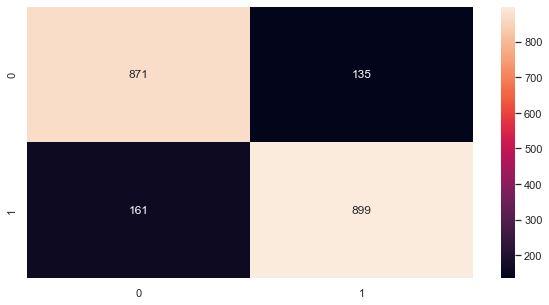

In [63]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Random Forest With Hyperparameter tuning

In [65]:
param_distributions = {
    'n_estimators':np.arange(50,251,50),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,10),
    'max_features':np.arange(1,4),
    'min_samples_leaf':np.arange(1,11)
}

In [66]:
estimator = RandomForestClassifier(random_state=0)

In [67]:
rscv = RandomizedSearchCV(estimator,param_distributions,cv=10)

In [68]:
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([1, 2, 3]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])})

In [69]:
rscv.best_params_

{'n_estimators': 150,
 'min_samples_leaf': 5,
 'max_features': 3,
 'max_depth': 7,
 'criterion': 'entropy'}

In [70]:
rscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       min_samples_leaf=5, n_estimators=150, random_state=0)

In [86]:
model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=7, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0,
                       verbose=0, warm_start=False)

In [87]:
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       min_samples_leaf=5, n_estimators=150, random_state=0)

In [88]:
y_pred = model.predict(X_test)

In [89]:
acc = accuracy_score(y_test, y_pred)
acc

0.8301064859632139

In [90]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[803, 203],
       [148, 912]], dtype=int64)

<AxesSubplot:>

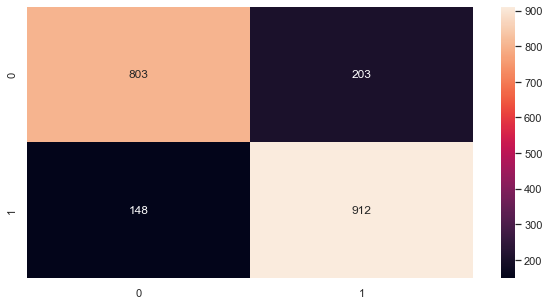

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [93]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [94]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.8591481122942884

In [107]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =500, max_depth = 4)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=4, n_estimators=500)

In [108]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.8630203291384317

In [109]:
cf = confusion_matrix(y_test, gbc_clf2.predict(X_test))
cf

array([[863, 143],
       [140, 920]], dtype=int64)

<AxesSubplot:>

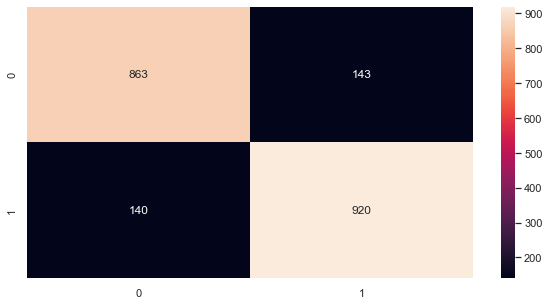

In [110]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,annot=True, fmt="d")

# Conclusion
 Gradient Boosting gave an accuracy of 86.30%

# Save your model

In [112]:
import joblib

In [113]:
joblib.dump(xgb_clf, r'G:\churn.sav')

['G:\\churn.sav']